In [1]:
from keras import applications
from keras import models
from keras import layers
from keras import metrics
from keras.preprocessing import image


import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Using TensorFlow backend.


In [2]:
metrics.confusion_matrix

AttributeError: module 'keras.metrics' has no attribute 'confusion_matrix'

In [2]:
N_CLASSES = 2
BATCH_SIZE = 32
DROP_OUT = 0.5

In [3]:
## carregando o modelo pre-treinado

vgg16 = applications.VGG16(include_top=False, weights = 'imagenet', input_shape = (224,224,3), pooling = None)
vgg19 = applications.VGG19(include_top=False, weights = 'imagenet', input_shape = (224,224,3), pooling = None)
resnet50 = applications.ResNet50(include_top=False, weights = 'imagenet', input_shape = (224,224,3), pooling = None)

/home/nasserboan/miniconda3/envs/deep/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [4]:
## congelando os layers

for layer in vgg16.layers:
    layer.trainable = False

for layer in vgg19.layers:
    layer.trainable = False
    
for layer in resnet50.layers:
    layer.trainable = False

## VGG16

In [5]:
model_vgg16 = models.Sequential()
model_vgg16.add(vgg16)

model_vgg16.add(layers.Flatten(name='flattened'))
model_vgg16.add(layers.Dropout(DROP_OUT, name='dropout'))
model_vgg16.add(layers.Dense(N_CLASSES, activation='softmax', name='predictions'))

model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[metrics.AUC(),metrics.FalseNegatives()])

model_vgg16.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flattened (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
predictions (Dense)          (None, 2)                 50178     
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


## VGG19

In [6]:
model_vgg19 = models.Sequential()
model_vgg19.add(vgg19)

model_vgg19.add(layers.Flatten(name='flattened'))
model_vgg19.add(layers.Dropout(DROP_OUT, name='dropout'))
model_vgg19.add(layers.Dense(N_CLASSES, activation='softmax', name='predictions'))

model_vgg19.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[metrics.AUC(),metrics.FalseNegatives()])

model_vgg19.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flattened (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
predictions (Dense)          (None, 2)                 50178     
Total params: 20,074,562
Trainable params: 50,178
Non-trainable params: 20,024,384
_________________________________________________________________


## ResNet50

In [7]:
model_resnet50 = models.Sequential()
model_resnet50.add(resnet50)

model_resnet50.add(layers.Flatten(name='flattened'))
model_resnet50.add(layers.Dropout(DROP_OUT, name='dropout'))
model_resnet50.add(layers.Dense(N_CLASSES, activation='softmax', name='predictions'))

model_resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[metrics.AUC(),metrics.FalseNegatives()])

model_resnet50.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flattened (Flatten)          (None, 100352)            0         
_________________________________________________________________
dropout (Dropout)            (None, 100352)            0         
_________________________________________________________________
predictions (Dense)          (None, 2)                 200706    
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


## Dados

In [8]:
train_datagen = image.ImageDataGenerator(rescale = 1.0/255,
                                        data_format = 'channels_last',
                                        rotation_range = 30,
                                        horizontal_flip = True,
                                        fill_mode = 'reflect')

test_datagen = image.ImageDataGenerator(rescale = 1.0/255,
                                        data_format = 'channels_last')

In [9]:
train_generator = train_datagen.flow_from_directory('../0data/train/',
                                                   target_size = (224,224),
                                                   classes = ['NORMAL','PNEUMONIA'],
                                                   class_mode = 'categorical',
                                                   batch_size = BATCH_SIZE,
                                                   shuffle = True,
                                                   seed = 42)

test_generator = test_datagen.flow_from_directory('../0data/test/',
                                                   target_size = (224,224),
                                                   classes = ['NORMAL','PNEUMONIA'],
                                                   class_mode = 'categorical',
                                                   batch_size = BATCH_SIZE,
                                                   shuffle = True,
                                                   seed = 42)

Found 5220 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
vgg16_train_history = model_vgg16.fit_generator(train_generator, 
                                                epochs = 10,
                                                validation_data = test_generator)

Epoch 1/10
164/164 [==============================] - 70s 424ms/step - loss: 0.2559 - auc_1: 0.9654 - false_negatives_1: 503.0000 - val_loss: 0.6195 - val_auc_1: 0.9407 - val_false_negatives_1: 79.0000
Epoch 2/10
164/164 [==============================] - 65s 393ms/step - loss: 0.1128 - auc_1: 0.9917 - false_negatives_1: 232.0000 - val_loss: 0.5622 - val_auc_1: 0.8768 - val_false_negatives_1: 145.0000
Epoch 3/10
164/164 [==============================] - 66s 401ms/step - loss: 0.1081 - auc_1: 0.9921 - false_negatives_1: 219.0000 - val_loss: 0.3772 - val_auc_1: 0.8932 - val_false_negatives_1: 125.0000
Epoch 4/10
164/164 [==============================] - 67s 406ms/step - loss: 0.0964 - auc_1: 0.9940 - false_negatives_1: 199.0000 - val_loss: 0.4600 - val_auc_1: 0.9425 - val_false_negatives_1: 76.0000
Epoch 5/10
164/164 [==============================] - 66s 405ms/step - loss: 0.0895 - auc_1: 0.9948 - false_negatives_1: 175.0000 - val_loss: 0.4135 - val_auc_1: 0.8933 - val_false_negatives

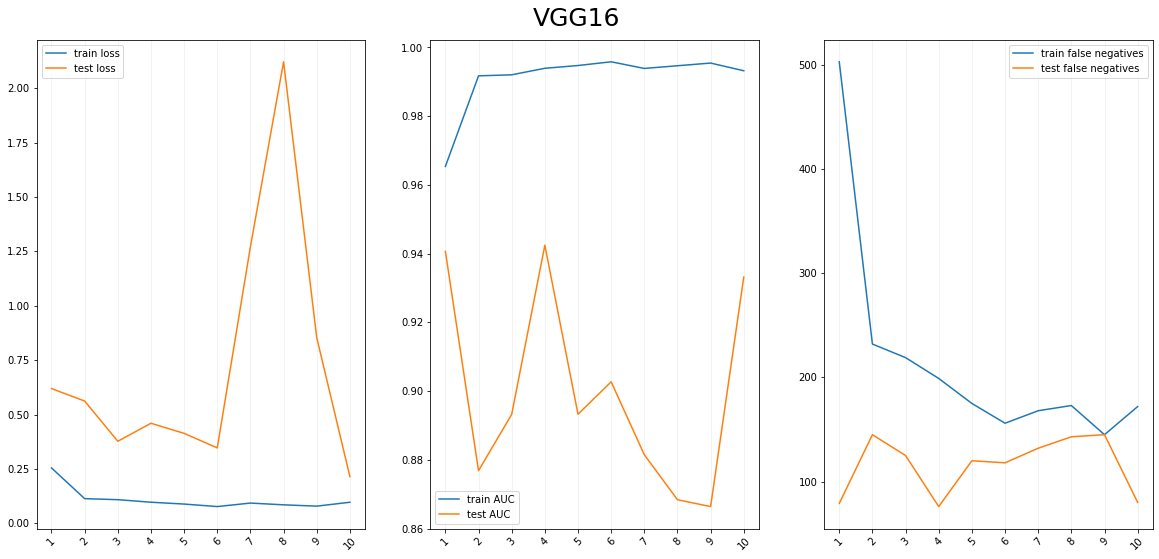

In [11]:
import matplotlib.pyplot as plt

def plot_results(title,data,number) -> plt.figure:
    
    data = data.history
    f, ax = plt.subplots(1,3,figsize=(20,9))
    plt.suptitle(title,y=0.93,size=25)

    ax[0].plot(list(range(1,11)),data['loss'],color='tab:blue',label = 'train loss')
    ax[0].plot(list(range(1,11)),data['val_loss'],color='tab:orange',label = 'test loss')
    ax[0].grid(which='major',axis='x',alpha=0.2)
    ax[0].set_xticks(list(range(1,11)))
    ax[0].set_xticklabels(labels = list(range(1,11)),rotation=45)
    ax[0].legend()

    ax[1].plot(list(range(1,11)),data[f'auc_{number}'],color='tab:blue',label = 'train AUC')
    ax[1].plot(list(range(1,11)),data[f'val_auc_{number}'],color='tab:orange',label = 'test AUC')
    ax[1].grid(which='major',axis='x',alpha=0.2)
    ax[1].set_xticks(list(range(1,11)))
    ax[1].set_xticklabels(labels = list(range(1,11)),rotation=45)
    ax[1].legend()

    ax[2].plot(list(range(1,11)),data[f'false_negatives_{number}'],color='tab:blue',label = 'train false negatives')
    ax[2].plot(list(range(1,11)),data[f'val_false_negatives_{number}'],color='tab:orange',label = 'test false negatives')
    ax[2].grid(which='major',axis='x',alpha=0.2)
    ax[2].set_xticks(list(range(1,11)))
    ax[2].set_xticklabels(labels = list(range(1,11)),rotation=45)
    ax[2].legend()

#plt.savefig('lenet/lenet_train.png')

plot_results('VGG16', vgg16_train_history,1)

In [12]:
vgg19_train_history = model_vgg19.fit_generator(train_generator, 
                                                epochs = 10,
                                                validation_data = test_generator)

Epoch 1/10
164/164 [==============================] - 71s 432ms/step - loss: 0.2874 - auc_2: 0.9584 - false_negatives_2: 523.0000 - val_loss: 0.8390 - val_auc_2: 0.8820 - val_false_negatives_2: 140.0000
Epoch 2/10
164/164 [==============================] - 66s 404ms/step - loss: 0.1435 - auc_2: 0.9874 - false_negatives_2: 290.0000 - val_loss: 1.4925 - val_auc_2: 0.8543 - val_false_negatives_2: 160.0000
Epoch 3/10
164/164 [==============================] - 69s 423ms/step - loss: 0.1221 - auc_2: 0.9911 - false_negatives_2: 242.0000 - val_loss: 0.4180 - val_auc_2: 0.7901 - val_false_negatives_2: 202.0000
Epoch 4/10
164/164 [==============================] - 69s 419ms/step - loss: 0.1279 - auc_2: 0.9897 - false_negatives_2: 251.0000 - val_loss: 0.9278 - val_auc_2: 0.8381 - val_false_negatives_2: 165.0000
Epoch 5/10
164/164 [==============================] - 68s 412ms/step - loss: 0.1143 - auc_2: 0.9919 - false_negatives_2: 224.0000 - val_loss: 0.0066 - val_auc_2: 0.8628 - val_false_negativ

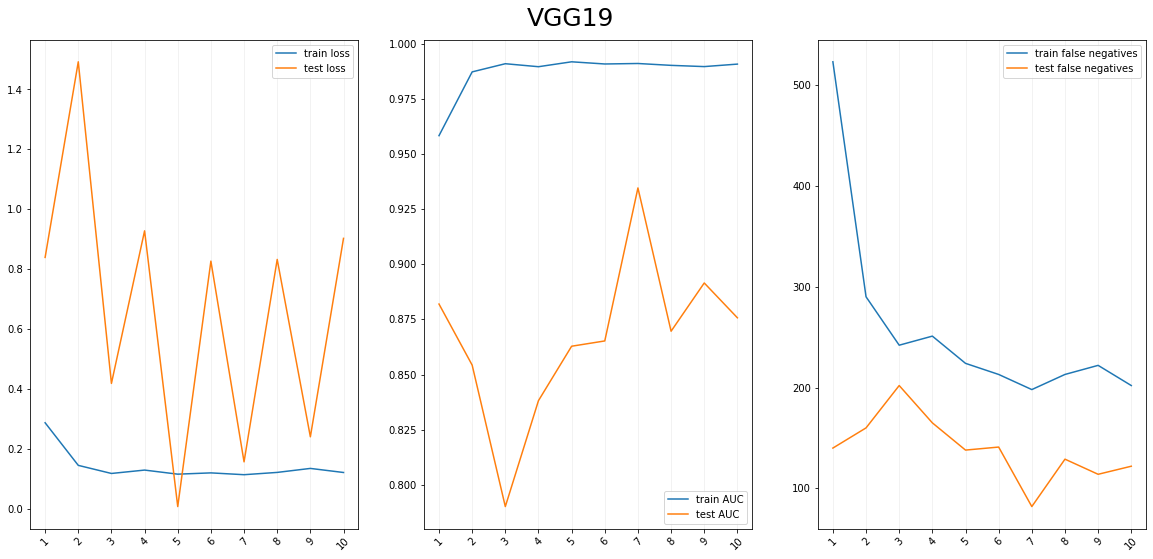

In [13]:
plot_results('VGG19', vgg19_train_history,2)

In [14]:
resnet50_train_history = model_resnet50.fit_generator(train_generator, 
                                                epochs = 10,
                                                validation_data = test_generator)

Epoch 1/10
164/164 [==============================] - 75s 456ms/step - loss: 0.8988 - auc_3: 0.9535 - false_negatives_3: 321.0000 - val_loss: 13.0278 - val_auc_3: 0.6250 - val_false_negatives_3: 234.0000
Epoch 2/10
164/164 [==============================] - 70s 428ms/step - loss: 0.8354 - auc_3: 0.9668 - false_negatives_3: 224.0000 - val_loss: 9.3717 - val_auc_3: 0.6250 - val_false_negatives_3: 234.0000
Epoch 3/10
164/164 [==============================] - 69s 423ms/step - loss: 0.6642 - auc_3: 0.9715 - false_negatives_3: 189.0000 - val_loss: 32.7956 - val_auc_3: 0.6250 - val_false_negatives_3: 234.0000
Epoch 4/10
164/164 [==============================] - 69s 421ms/step - loss: 0.6937 - auc_3: 0.9742 - false_negatives_3: 158.0000 - val_loss: 15.9341 - val_auc_3: 0.6250 - val_false_negatives_3: 234.0000
Epoch 5/10
164/164 [==============================] - 70s 428ms/step - loss: 0.7235 - auc_3: 0.9764 - false_negatives_3: 143.0000 - val_loss: 16.3937 - val_auc_3: 0.6250 - val_false_neg

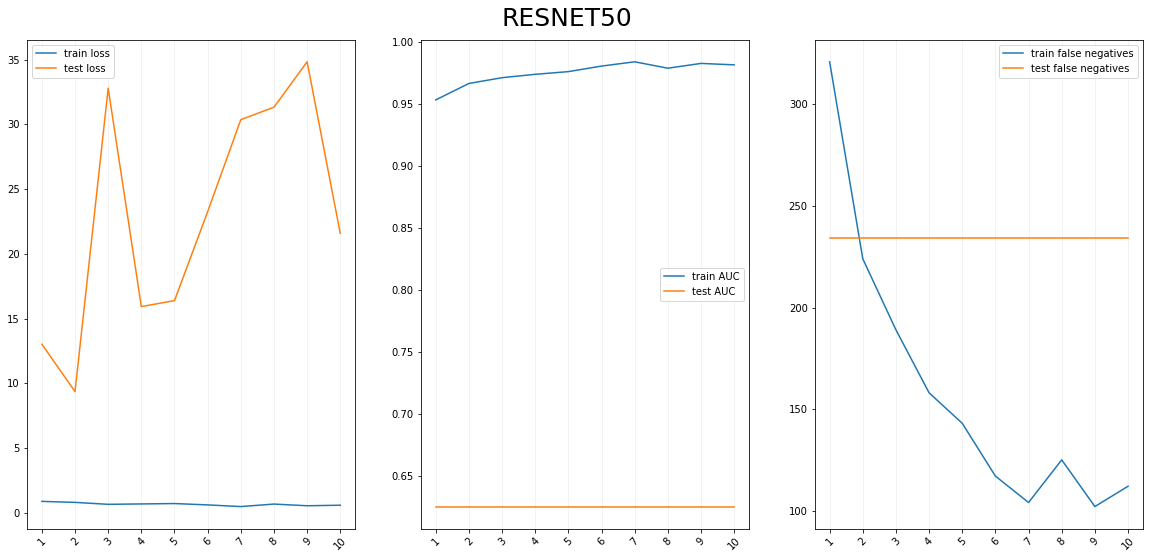

In [15]:
plot_results('RESNET50', resnet50_train_history,3)